<a href="https://colab.research.google.com/github/aisha-partha/AIMLOps-MiniProjects/blob/mp_3/M2_NB_MiniProject_1_Face_Mask_Detection_G4_Final_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini Project: Face Mask Detection using Convolutional Neural Networks

## Learning Objectives

At the end of the experiment, you will be able to :

* load the image dataset using ImageDataGenerator from the path directory
* perform data augmentation on the fly and create  batches of the dataset
* build the convolutional neural networks for classification problem
* visualize & interpret what CNN layers learn
* use the transfer learning (pre-trained models) for classification problems

## Introduction

This project uses a Deep Neural Network, more specifically a Convolutional Neural Network, to differentiate between images of people, with masks, without masks and incorrectly placed masks. Manually built and pretrained networks will be used to perform this classification task.

**Face-Mask-Detection-Using-CNN**

* Outbreak of the Coronavirus pandemic has created various changes in the lifestyle of everyone around the world.
* Among these changes, wearing a mask has been very vital to every individual.
* Detection of people who are not wearing masks is a challenge due to the large populations.
* This face mask detection project can be used in schools, hospitals, banks, airports etc as a digitalized scanning tool.
  - The technique of detecting people’s faces and segregating them into three classes namely the people with masks and people without masks and partial masks is done with the help of image processing and deep learning.
* With the help of this project, a person who is monitoring the face mask status for a particular firm can be seated in a remote area and still monitor efficiently and give instructions accordingly.

![img](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/dataset-images-with-mask.jpg)

## Dataset

The data for this mini-project is collected from various sources including the masked images from internet and general frontal face images considered as without mask. This dataset consists of 5029 train images and 1059 test images with 3 classes `with_mask`, `without_mask` and `partial_mask`

Many people are not correctly wearing their masks due to bad practices, bad behaviors or vulnerability of individuals (e.g., children, old people). For these reasons, several mask wearing campaigns intend to sensitize people about this problem and good practices. In this sense, this work proposes three types of masked face detection dataset
  
- Without Mask/ With Mask/ Partial Mask
  
Note that this dataset contains some annotated (artificially generated) masks to augment the 'masked' data category.

## Problem Statement

To build and implement a Convolutional Neural Network model to classify between masked/unmasked/partially masked faces.

In [2]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip
!unzip -qq MP2_FaceMask_Dataset.zip
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


## Grading = 10 Points

### Import Required packages

In [3]:
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import PIL
from matplotlib import pyplot as plt
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf
from tensorflow import keras
import glob, os
from PIL import Image

# Part-A [5-Marks]

### Analyzing the shape and distribution of datasets [1 Mark]

Store the list of the paths from the training dataset for images of partial-mask, with_mask, and without_mask in variables partial, on, and off respectively. Hint : [Check the 'glob' section.](https://realpython.com/working-with-files-in-python/)

/content/MP2_FaceMask_Dataset/train/partial_mask/
Number of partial-mask images: 1294
Number of with-mask images: 1574
Number of without-mask images: 2126


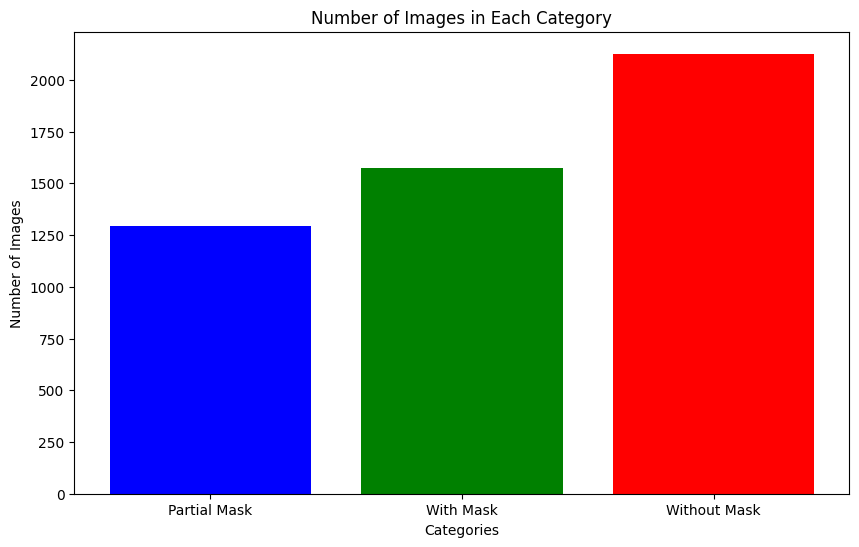

In [4]:
# YOUR CODE HERE

data_dir = '/content/MP2_FaceMask_Dataset'

train_path = data_dir + '/train'
#validation_path = data_dir + '/validation'
test_path = data_dir + '/test'

# Define the paths to your dataset directories
partial_mask_dir = train_path + "/partial_mask/"
with_mask_dir = train_path + "/with_mask/"
without_mask_dir = train_path + "/without_mask/"

# prompt: how to remove unsupported files from training data set

import os

# Get a list of all files in the training directory
files = os.listdir(partial_mask_dir)

# Iterate through the files and remove any that are not supported image formats
for file in files:
    image_path = os.path.join(partial_mask_dir, file)
    image_data = open(image_path, 'rb').read()
    if not any([image_data.startswith(b'\xff\xd8'),  # JPEG
                image_data.startswith(b'\x89PNG'),  # PNG
                image_data.startswith(b'GIF8'),    # GIF
                image_data.startswith(b'BM')]):   # BMP
        os.remove(image_path)

files = os.listdir(with_mask_dir)

# Iterate through the files and remove any that are not supported image formats
for file in files:
    image_path = os.path.join(with_mask_dir, file)
    image_data = open(image_path, 'rb').read()
    if not any([image_data.startswith(b'\xff\xd8'),  # JPEG
                image_data.startswith(b'\x89PNG'),  # PNG
                image_data.startswith(b'GIF8'),    # GIF
                image_data.startswith(b'BM')]):   # BMP
        os.remove(image_path)

files = os.listdir(without_mask_dir)

# Iterate through the files and remove any that are not supported image formats
for file in files:
    image_path = os.path.join(without_mask_dir, file)
    image_data = open(image_path, 'rb').read()
    if not any([image_data.startswith(b'\xff\xd8'),  # JPEG
                image_data.startswith(b'\x89PNG'),  # PNG
                image_data.startswith(b'GIF8'),    # GIF
                image_data.startswith(b'BM')]):   # BMP
        os.remove(image_path)


print(partial_mask_dir)

'''
if os.path.exists(partial_mask_dir):
    # Get the list of files and directories in the folder
    folder_content = os.listdir(partial_mask_dir)

    # Print each item in the folder
    for item in folder_content:
        print(item)
else:
    print("Directory not found:", partial_mask_dir)
'''
# Use glob to retrieve paths for each category
partial = glob.glob(partial_mask_dir + "*.jpg") + glob.glob(partial_mask_dir + "*.png")
#partial = glob.glob(partial_mask_dir + "*.jpg")
on = glob.glob(with_mask_dir + "*.jpg") + glob.glob(with_mask_dir + "*.png")
off = glob.glob(without_mask_dir + "*.jpg") + glob.glob(without_mask_dir + "*.png")

# Print the number of images in each category
print("Number of partial-mask images:", len(partial))
print("Number of with-mask images:", len(on))
print("Number of without-mask images:", len(off))

# Plot the number of images in each category
categories = ['Partial Mask', 'With Mask', 'Without Mask']
counts = [len(partial), len(on), len(off)]

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['blue', 'green', 'red'])
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Category')
plt.show()


Store paths of all three types of images in one variable. Check and store the height and width of each image.

Hint: Use PIL(PIL.Image.open) library to open the image from the path, convert it into a NumPy array and check for shape.  

In [5]:
# YOUR CODE HERE
allImgs = partial + on + off
#print(allImgs)
#print(len(allImgs))
img_hw_dict = {}
for i in allImgs:
    img = PIL.Image.open(i)  # Open the image using PIL
    img_array = np.array(img) # Convert the image to a NumPy array

    # Get the shape of the array (height, width, channels)
    height, width, channels = img_array.shape
    # Print the filename along with its height and width
    #print(f"Image: {i}, Height: {height}, Width: {width}")
    img_hw_dict[i] = [height, width]
print(img_hw_dict)


{'/content/MP2_FaceMask_Dataset/train/partial_mask/51094_Mask_Mouth_Chin.jpg': [1024, 1024], '/content/MP2_FaceMask_Dataset/train/partial_mask/51976_Mask_Mouth_Chin.jpg': [1024, 1024], '/content/MP2_FaceMask_Dataset/train/partial_mask/68529_Mask_Mouth_Chin.jpg': [1024, 1024], '/content/MP2_FaceMask_Dataset/train/partial_mask/51126_Mask_Mouth_Chin.jpg': [1024, 1024], '/content/MP2_FaceMask_Dataset/train/partial_mask/51726_Mask_Mouth_Chin.jpg': [1024, 1024], '/content/MP2_FaceMask_Dataset/train/partial_mask/68610_Mask_Mouth_Chin.jpg': [1024, 1024], '/content/MP2_FaceMask_Dataset/train/partial_mask/51607_Mask_Mouth_Chin.jpg': [1024, 1024], '/content/MP2_FaceMask_Dataset/train/partial_mask/51190_Mask_Nose_Mouth.jpg': [1024, 1024], '/content/MP2_FaceMask_Dataset/train/partial_mask/51673_Mask_Mouth_Chin.jpg': [1024, 1024], '/content/MP2_FaceMask_Dataset/train/partial_mask/51813_Mask_Mouth_Chin.jpg': [1024, 1024], '/content/MP2_FaceMask_Dataset/train/partial_mask/51159_Mask_Mouth_Chin.jpg': [

In [7]:
# YOUR CODE HERE
# Initialize variables to store max, min, and total height and width
#
'''
max_height = 0
max_width = 0
min_height = float('inf')
min_width = float('inf')
total_height = 0
total_width = 0
num_images = 0

for i in allImgs:
    img = PIL.Image.open(i)  # Open the image using PIL
    img_array = np.array(img) # Convert the image to a NumPy array
    # Get the shape of the array (height, width, channels)
    height, width, _ = img_array.shape
            # Update max and min height and width
    max_height = max(max_height, height)
    max_width = max(max_width, width)
    min_height = min(min_height, height)
    min_width = min(min_width, width)

    # Update total height and width
    total_height += height
    total_width += width

    # Increment the number of images
    num_images += 1

# Calculate average height and width
avg_height = total_height / num_images
avg_width = total_width / num_images

# Display results
print("Distribution of Images:")
print("Max Height:", max_height)
print("Max Width:", max_width)
print("Min Height:", min_height)
print("Min Width:", min_width)
print("Average Height:", avg_height)
print("Average Width:", avg_width)
'''




# Define the data directory
data_dir = '/content/MP2_FaceMask_Dataset'

train_path = data_dir + '/train'
#validation_path = data_dir + '/validation'
test_path = data_dir + '/test'

# Define the paths to your dataset directories
partial_mask_dir = train_path + "/partial_mask/"
with_mask_dir = train_path + "/with_mask/"
without_mask_dir = train_path + "/without_mask/"

# Use glob to retrieve paths for each category
partial = glob.glob(partial_mask_dir + "*.jpg") + glob.glob(partial_mask_dir + "*.png")
with_mask = glob.glob(with_mask_dir + "*.jpg") + glob.glob(with_mask_dir + "*.png")
without_mask = glob.glob(without_mask_dir + "*.jpg") + glob.glob(without_mask_dir + "*.png")

# Combine all image paths
allImgs = partial + with_mask + without_mask

# Initialize an empty list to store dimensions
dimensions = []

# Load images and store their dimensions
for i in allImgs:
    img = Image.open(i)
    dimensions.append(img.size)  # Append (width, height) tuple

# Convert dimensions list to a NumPy array
dimensions = np.array(dimensions)

# Calculate min, max, and average using NumPy functions
max_height = np.max(dimensions[:, 1])
max_width = np.max(dimensions[:, 0])
min_height = np.min(dimensions[:, 1])
min_width = np.min(dimensions[:, 0])
avg_height = np.mean(dimensions[:, 1])
avg_width = np.mean(dimensions[:, 0])

# Display results
print("Distribution of Images:")
print("Max Height:", max_height)
print("Max Width:", max_width)
print("Min Height:", min_height)
print("Min Width:", min_width)
print("Average Height:", avg_height)
print("Average Width:", avg_width)








Distribution of Images:
Max Height: 4608
Max Width: 3456
Min Height: 141
Min Width: 110
Average Height: 450.82478974769725
Average Width: 435.65818982779336


In [8]:
partial_mask_dir_test = test_path + "/partial_mask/"
with_mask_dir_test = test_path + "/with_mask/"
without_mask_dir_test = test_path + "/without_mask/"

# Use glob to retrieve paths for each category
partial_test = glob.glob(partial_mask_dir_test + "*.jpg") + glob.glob(partial_mask_dir_test + "*.png")
with_mask_test = glob.glob(with_mask_dir_test + "*.jpg") + glob.glob(with_mask_dir_test + "*.png")
without_mask_test = glob.glob(without_mask_dir_test + "*.jpg") + glob.glob(without_mask_dir_test + "*.png")

# Combine all image paths
allImgs_test = partial_test + with_mask_test + without_mask_test

# Initialize an empty list to store dimensions
dimensions = []

# Load images and store their dimensions
for i in allImgs_test:
    img = Image.open(i)
    dimensions.append(img.size)  # Append (width, height) tuple

# Convert dimensions list to a NumPy array
dimensions = np.array(dimensions)

# Calculate min, max, and average using NumPy functions
max_height = np.max(dimensions[:, 1])
max_width = np.max(dimensions[:, 0])
min_height = np.min(dimensions[:, 1])
min_width = np.min(dimensions[:, 0])
avg_height = np.mean(dimensions[:, 1])
avg_width = np.mean(dimensions[:, 0])

# Display results
print("Distribution of Images:")
print("Max Height:", max_height)
print("Max Width:", max_width)
print("Min Height:", min_height)
print("Min Width:", min_width)
print("Average Height:", avg_height)
print("Average Width:", avg_width)

Distribution of Images:
Max Height: 1918
Max Width: 1920
Min Height: 141
Min Width: 110
Average Height: 446.89566613162117
Average Width: 436.0890850722311


Discuss the distribution of images. Calculate and display max, min and average of height and width of all images.

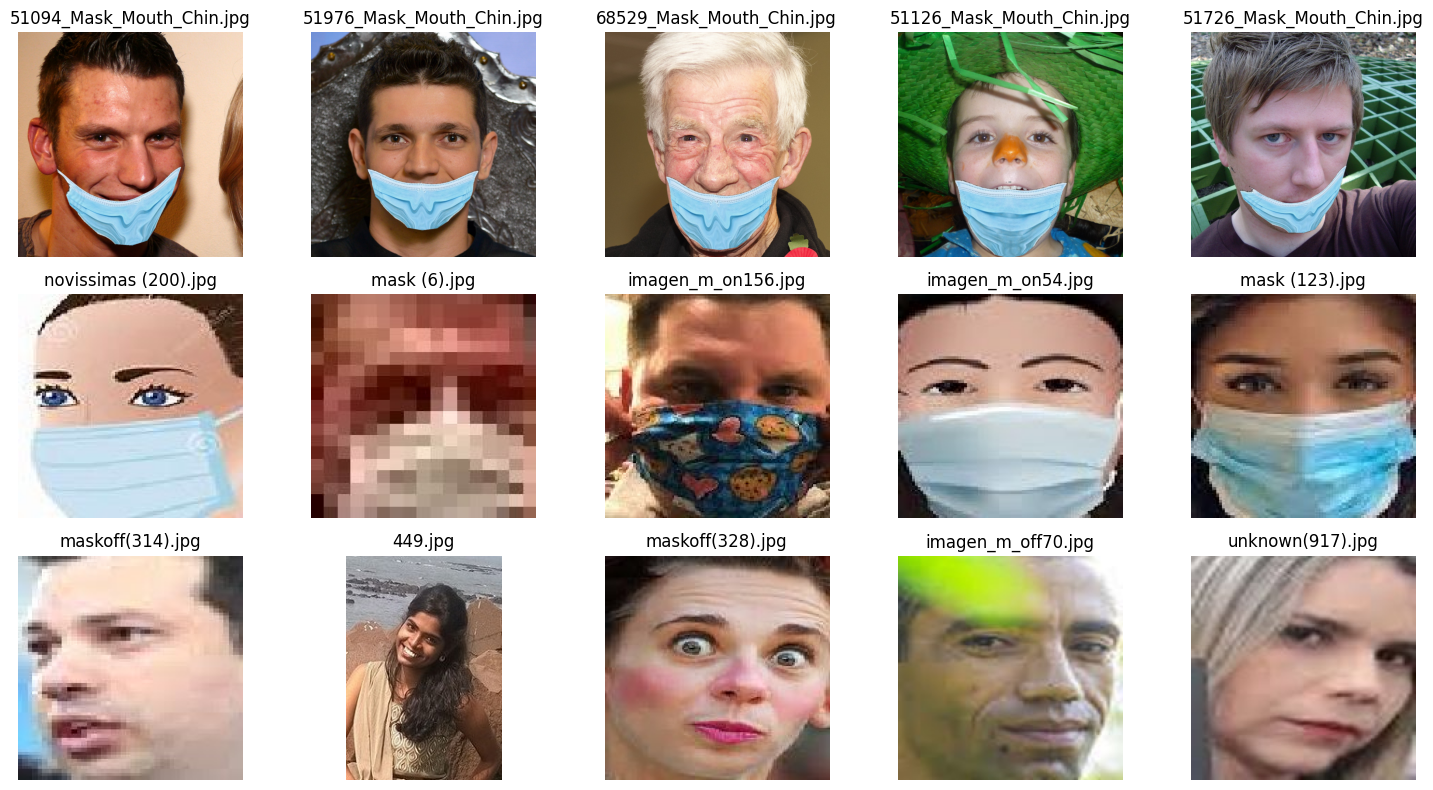

In [9]:
# YOUR CODE HERE
# Define the number of images to display for each class
num_images_per_class = 5
# Define the classes
classes = [partial_mask_dir , with_mask_dir, without_mask_dir]
# Create subplots
fig, axs = plt.subplots(len(classes), num_images_per_class, figsize=(15, 8))
#print(fig)
#print(axs[2,2])
# Iterate through each class
for i, cls in enumerate(classes):
    sample_imgs = os.listdir(cls)[:num_images_per_class]

    # Iterate through sample images in the class
    for j, image_file in enumerate(sample_imgs):
        # Open the image using PIL
        image_path = os.path.join(cls, image_file)
        img_sample = PIL.Image.open(image_path)

        # Plot the image on the appropriate axis
        axs[i, j].imshow(img_sample)
        axs[i, j].set_title(image_file)  # Set title as image filename
        axs[i, j].axis('off')

plt.tight_layout()
plt.show()


### Visualize the sample images of each class before augmentation [1 Mark]

In [10]:
# YOUR CODE HERE
# Define image data generator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images by 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20%
    height_shift_range=0.2,  # Randomly shift images vertically by 20%
    shear_range=0.2,  # Shear intensity (shear angle in radians)
    zoom_range=0.2,  # Randomly zoom images by 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels using the nearest value
)

# Define image data generator for validation and test sets
#validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Create image generators for training, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # Resize images to 224 * 224 pixels
    batch_size=batch_size,
    class_mode='categorical'  # Use categorical labels
)

'''
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)
'''

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5028 images belonging to 3 classes.
Found 1259 images belonging to 3 classes.


### Load the images using ImageDataGenerator [1 Mark]

There are two main steps involved in creating the generator.
1. Instantiate ImageDataGenerator with required arguments to create an object
2. Use the `flow_from_directory` command depending on how your data is stored on disk. This is the command that will allow you to generate and get access to batches of data on the fly.

Hint: [link](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [ ]:
# YOUR CODE HERE

In [11]:
TRAINING_DIR = "/content/MP2_FaceMask_Dataset/train/"
VALIDATION_DIR = "/content/MP2_FaceMask_Dataset/test/"

In [12]:
# YOUR CODE HERE
# Check class indices
print("Class Indices:", train_generator.class_indices)
print("Class Indices:", test_generator.class_indices)

Class Indices: {'partial_mask': 0, 'with_mask': 1, 'without_mask': 2}
Class Indices: {'partial_mask': 0, 'with_mask': 1, 'without_mask': 2}


Check class indices

In [ ]:
# YOUR CODE HERE

Check the shape of the image from train_generator

In [13]:
# YOUR CODE HERE
# Get a batch of images and labels from train_generator
images, labels = next(train_generator)


In [14]:
# YOUR CODE HERE


# Check the shape of the images
print("Shape of images:", images.shape) #The shape will typically be (batch_size, height, width, channels(RGB))


Shape of images: (32, 224, 224, 3)


### Visualize a few sample images using data generator [1 Mark]

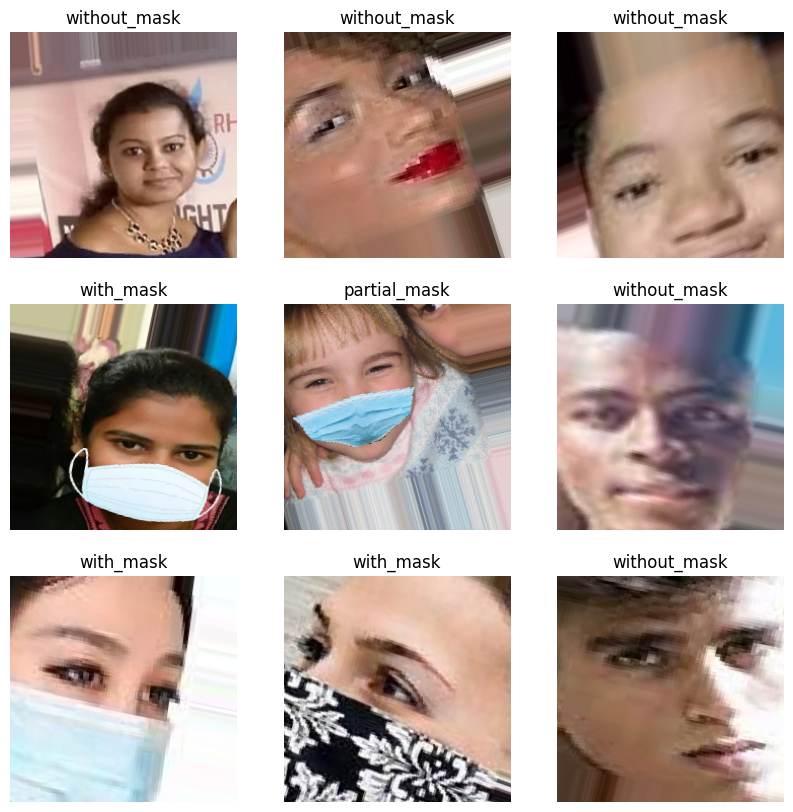

In [15]:
# YOUR CODE HERE
# Get a batch of images and labels from train_generator
images, labels = next(train_generator)

# Define the class labels
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Plot sample images
plt.figure(figsize=(10, 10))
for i in range(min(9, len(images))):  # Plot up to 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].argmax()])  # Get the corresponding class label
    plt.axis("off")
plt.show()

In [ ]:
# YOUR CODE HERE

## Build the CNN model using Keras [1 Mark]



**Convolutional Neural Network:** A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers:

* convolutional layers
* pooling layers
* dense layers


**Conv2D**  

Passing an image with input shape of 3-D and to calculate the output:

 $O = \frac{n - f + 2p}{s} + 1$

 where

 $n$ = image dimension

 $f$ = filter size

 $p$ = padding

 $s$ = stride

**MaxPool**

The resulting output, when using the "valid" padding option, has a spatial shape (number of rows or columns) of:

O = `math.floor`$(\frac{input shape - pool size)}{ strides}) + 1$ (when input shape >= pool size)

The resulting output shape when using the "same" padding option is:

O = `math.floor`$(\frac{input shape - 1}{strides}) + 1$

by default, stride = None, so stride is same as pool size

Task-flow
* Initialize the network of convolution, maxpooling and dense layers
* Define the optimizer and loss functions
* Fit the model and evaluate the model

**model 1 with 2 convolutional (feature representation) and 2 maxpool layers (down sampling) and 2 dense layers for classification.**

In [ ]:
model1 = Sequential([
    # YOUR CODE HERE          #convolutional layer 1: No. of filters=100, filter size=3x3, activation = relu, input_shap = 224x224x3,
    # YOUR CODE HERE                                                         #Maxpooling2D filter size=2x2


# Convolutional layer 1
    Conv2D(100, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    #BatchNormalization(),
    # MaxPooling layer 1
    MaxPooling2D(pool_size=(2, 2)),


   # YOUR CODE HERE                                  #convolutional layer 2: No. of filters=100, filter size=3x3, activation = relu,
   # YOUR CODE HERE                                                         #Maxpooling2D filter size=2x2

# Convolutional layer 2
    Conv2D(100, (3, 3), activation='relu'),
    #BatchNormalization(),
    # MaxPooling layer 2
    MaxPooling2D(pool_size=(2, 2)),
     # Flatten layer
    Flatten(),
    # Dense layer 1
    Dense(256, activation='relu'),
    #Dense(1, activation='sigmoid')
    # Dense layer 2
    Dense(3, activation='softmax')  # For multi class classification
])

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 100)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 100)     90100     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 100)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 291600)            0         
                                                                 
 dense (Dense)               (None, 256)               7

In [ ]:
# YOUR CODE HERE
#model1 = Sequential()
#model1.add(Conv2D(100, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Get the Conv2D layer from the model
#conv_layer = model1.layers[0]

# Print the details about the reduction in image dimensions
#print("Input image shape:", conv_layer.input_shape[1:3])
#print("Output image shape after convolution:", (conv_layer.input_shape[1] - 2, conv_layer.input_shape[2] - 2))

#Note: Applying a convolution to an image will make it smaller (if no padding).
#Convolving a 3x3 filter over images means we’ll lose a single pixel on all sides (2 in total).
#In the given case, sliding a 3x3 filter over a 224x224 image results in a 222x222 image

Fit the data to the model

In [ ]:
# YOUR CODE HERE
# Compile the model with an optimizer and a loss function
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    # Early stopping to prevent overfitting
    EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
    # Model checkpoint to save the best model during training
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')]

#history1 = model1.fit(train_generator, epochs=10, validation_data=test_generator)
history1 = model1.fit(train_generator, epochs=20, validation_data=test_generator, callbacks=callbacks)

test_loss, test_accuracy = model1.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
158/158 [==============================] - ETA: 0s - loss: 1.0365 - accuracy: 0.6514

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


158/158 [==============================] - 104s 594ms/step - loss: 1.0365 - accuracy: 0.6514 - val_loss: 0.3690 - val_accuracy: 0.8777
Epoch 2/20
158/158 [==============================] - 100s 633ms/step - loss: 0.3810 - accuracy: 0.8596 - val_loss: 0.2182 - val_accuracy: 0.9404
Epoch 3/20
158/158 [==============================] - 114s 721ms/step - loss: 0.3250 - accuracy: 0.8837 - val_loss: 0.2007 - val_accuracy: 0.9555
Epoch 4/20
158/158 [==============================] - 97s 616ms/step - loss: 0.2697 - accuracy: 0.9050 - val_loss: 0.1814 - val_accuracy: 0.9484
Epoch 5/20
158/158 [==============================] - 97s 616ms/step - loss: 0.2583 - accuracy: 0.9089 - val_loss: 0.1666 - val_accuracy: 0.9611
Epoch 6/20
158/158 [==============================] - 96s 609ms/step - loss: 0.2300 - accuracy: 0.9141 - val_loss: 0.1469 - val_accuracy: 0.9619
Epoch 7/20
158/158 [==============================] - 97s 609ms/step - loss: 0.2306 - accuracy: 0.9187 - val_loss: 0.1418 - val_accuracy: 

Plot training and validation loss

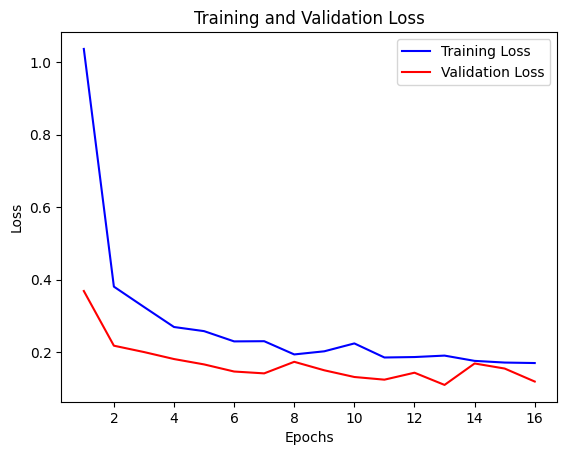

In [ ]:
# YOUR CODE HERE
# Get training and validation loss from the history object
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**model 2 with few more conv layers**

Task-flow
* Initialize the network of convolution, maxpooling and dense layers
* Define the optimizer and loss functions
* Define callback list
* Fit the model and evaluate the model

Define the model

In [ ]:
# YOUR CODE HERE
# Initialize the network   #MODEL2 with DROPUT
model2 = Sequential([
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    # Convolutional layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    # Add more convolutional layers as needed
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    # Flatten layer
    Flatten(),
    # Dense layers
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer with 3 classes
])

Compile the model

In [ ]:
# YOUR CODE HERE
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Define Callbacks

In [ ]:
# YOUR CODE HERE
callbacks = [
    # Early stopping to prevent overfitting
    EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
    # Model checkpoint to save the best model during training
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
]



Fit the data to the model

In [ ]:
# YOUR CODE HERE
# Fit the model with callbacks
history2 = model2.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=callbacks)
# Evaluate the model on the test data
test_loss, test_accuracy = model2.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
158/158 [==============================] - ETA: 0s - loss: 0.6584 - accuracy: 0.7469

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


158/158 [==============================] - 86s 506ms/step - loss: 0.6584 - accuracy: 0.7469 - val_loss: 0.3013 - val_accuracy: 0.9039
Epoch 2/10
158/158 [==============================] - 86s 547ms/step - loss: 0.2898 - accuracy: 0.8938 - val_loss: 0.1446 - val_accuracy: 0.9508
Epoch 3/10
158/158 [==============================] - 79s 499ms/step - loss: 0.2151 - accuracy: 0.9276 - val_loss: 0.1561 - val_accuracy: 0.9452
Epoch 4/10
158/158 [==============================] - 89s 560ms/step - loss: 0.1938 - accuracy: 0.9372 - val_loss: 0.1267 - val_accuracy: 0.9682
Epoch 5/10
158/158 [==============================] - 78s 495ms/step - loss: 0.1779 - accuracy: 0.9433 - val_loss: 0.2038 - val_accuracy: 0.9341
Epoch 6/10
158/158 [==============================] - 88s 558ms/step - loss: 0.1864 - accuracy: 0.9386 - val_loss: 0.0933 - val_accuracy: 0.9730
Epoch 7/10
158/158 [==============================] - 91s 576ms/step - loss: 0.1661 - accuracy: 0.9417 - val_loss: 0.0888 - val_accuracy: 0.9

Plot training and validation loss

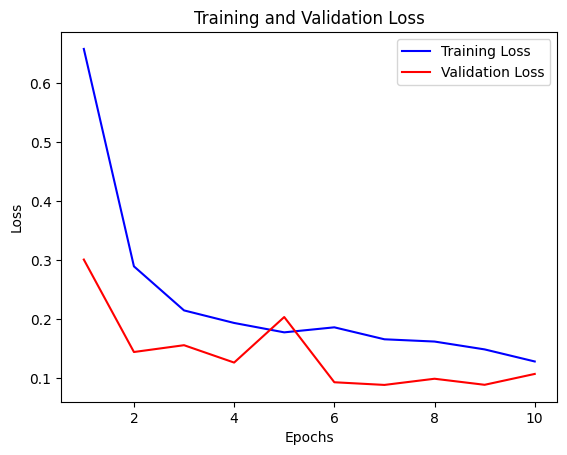

In [ ]:
# YOUR CODE HERE
# Get training and validation loss from the history object
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
158/158 [==============================] - 88s 544ms/step - loss: 0.5886 - accuracy: 0.7868 - val_loss: 0.2123 - val_accuracy: 0.9317
Epoch 2/10
158/158 [==============================] - 88s 558ms/step - loss: 0.2546 - accuracy: 0.9097 - val_loss: 0.1792 - val_accuracy: 0.9444
Epoch 3/10
158/158 [==============================] - 88s 559ms/step - loss: 0.2033 - accuracy: 0.9294 - val_loss: 0.1255 - val_accuracy: 0.9595
Epoch 4/10
158/158 [==============================] - 80s 504ms/step - loss: 0.1645 - accuracy: 0.9437 - val_loss: 0.1194 - val_accuracy: 0.9651
Epoch 5/10
158/158 [==============================] - 77s 490ms/step - loss: 0.1585 - accuracy: 0.9489 - val_loss: 0.1635 - val_accuracy: 0.9523
Epoch 6/10
158/158 [==============================] - 97s 612ms/step - loss: 0.1423 - accuracy: 0.9525 - val_loss: 0.1167 - val_accuracy: 0.9651
Epoch 7/10
158/158 [==============================] - 81s 514ms/step - loss: 0.1435 - accuracy: 0.9513 - val_loss: 0.0928 - val_ac

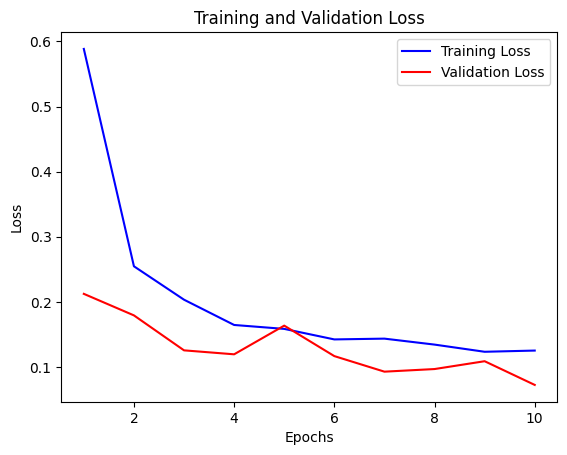

In [ ]:
#MODEL2 without DROPUT, just named it as model3

model3 = Sequential([
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    # Convolutional layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    # Add more convolutional layers as needed
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    # Flatten layer
    Flatten(),
    # Dense layers
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with 3 classes
])

# YOUR CODE HERE
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# YOUR CODE HERE
callbacks = [
    # Early stopping to prevent overfitting
    EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
    # Model checkpoint to save the best model during training
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
]

# Fit the model with callbacks
history3 = model3.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=callbacks)
# Evaluate the model on the test data
test_loss, test_accuracy = model3.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


# Get training and validation loss from the history object
train_loss = history3.history['loss']
val_loss = history3.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Prediction on a random test image

In [ ]:
# YOUR CODE HERE
# Initialize the network   #MODEL2 with DROPUT
model4 = Sequential([
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    # Convolutional layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    # Add more convolutional layers as needed
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    # Flatten layer
    Flatten(),
    # Dense layers
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer with 3 classes
])

In [ ]:
# YOUR CODE HERE
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# YOUR CODE HERE
callbacks = [
    # Early stopping to prevent overfitting
    EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
    # Model checkpoint to save the best model during training
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
]

In [ ]:
# YOUR CODE HERE
# Fit the model with callbacks
history4 = model4.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=callbacks)
# Evaluate the model on the test data
test_loss, test_accuracy = model4.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
158/158 [==============================] - ETA: 0s - loss: 0.6320 - accuracy: 0.7413

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


158/158 [==============================] - 89s 520ms/step - loss: 0.6320 - accuracy: 0.7413 - val_loss: 0.4095 - val_accuracy: 0.8554
Epoch 2/10
158/158 [==============================] - 92s 583ms/step - loss: 0.3968 - accuracy: 0.8513 - val_loss: 0.2182 - val_accuracy: 0.9182
Epoch 3/10
158/158 [==============================] - 79s 499ms/step - loss: 0.3121 - accuracy: 0.8882 - val_loss: 0.2347 - val_accuracy: 0.9174
Epoch 4/10
158/158 [==============================] - 89s 563ms/step - loss: 0.2598 - accuracy: 0.9137 - val_loss: 0.1549 - val_accuracy: 0.9563
Epoch 5/10
158/158 [==============================] - 89s 561ms/step - loss: 0.2216 - accuracy: 0.9258 - val_loss: 0.1436 - val_accuracy: 0.9595
Epoch 6/10
158/158 [==============================] - 86s 545ms/step - loss: 0.2048 - accuracy: 0.9324 - val_loss: 0.1297 - val_accuracy: 0.9627
Epoch 7/10
158/158 [==============================] - 88s 557ms/step - loss: 0.1999 - accuracy: 0.9342 - val_loss: 0.1192 - val_accuracy: 0.9

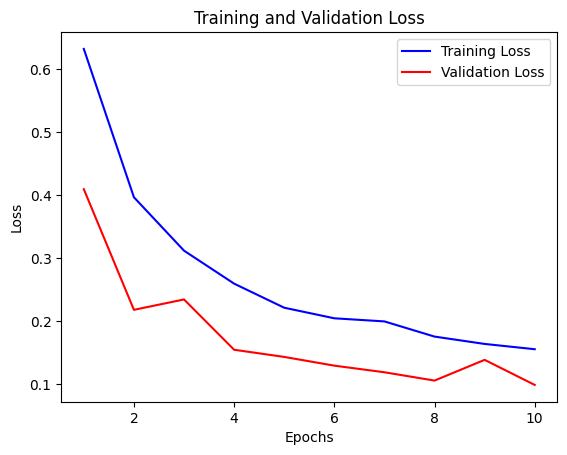

In [ ]:
# YOUR CODE HERE
# Get training and validation loss from the history object
train_loss = history4.history['loss']
val_loss = history4.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
his_1_df = pd.DataFrame(history1.history)
his_2_df = pd.DataFrame(history2.history)
his_3_df = pd.DataFrame(history3.history)
his_4_df = pd.DataFrame(history4.history)

ind = his_1_df[his_1_df['val_accuracy']==his_1_df['val_accuracy'].max()].index.to_list()[0]
model_1_values = his_1_df[his_1_df.index==ind].iloc[:, 2:].iloc[0].tolist()

ind = his_2_df[his_2_df['val_accuracy']==his_2_df['val_accuracy'].max()].index.to_list()[0]
model_2_values = his_2_df[his_2_df.index==ind].iloc[:, 2:].iloc[0].tolist()


ind = his_3_df[his_3_df['val_accuracy']==his_3_df['val_accuracy'].max()].index.to_list()[0]
model_3_values = his_3_df[his_3_df.index==ind].iloc[:, 2:].iloc[0].tolist()

ind = his_4_df[his_4_df['val_accuracy']==his_4_df['val_accuracy'].max()].index.to_list()[0]
model_4_values = his_4_df[his_3_df.index==ind].iloc[:, 2:].iloc[0].tolist()

# Create a dataframe for computed metrics for different models
metric_values = ['val_loss', 'val_accuracy']
metric_df = pd.DataFrame({'metric': metric_values,
                         'Model 1': model_1_values,
                          'Model 2': model_2_values,
                          'Model 3': model_3_values,
                          'Model 4': model_4_values
                          })
metric_df.head()

,metric,Model 1,Model 2,Model 3,Model 4
0,val_loss,0.109990,0.088753,0.072383,0.093989
1,val_accuracy,0.969817,0.976172,0.979349,0.976172


In [ ]:
# YOUR CODE HERE
# YOUR CODE HERE
img_path = test_path + "/without_mask/121.jpg"
img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to match the input size of your model
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the image (e.g., rescale pixel values to [0, 1])
img_array = img_array / 255.0
# Make predictions using the trained model
predictions = model2.predict(img_array)

# Interpret the predictions
class_labels = ['partial_mask', 'with_mask', 'without_mask']  # Define the class labels
predicted_class_index = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_class_label = class_labels[predicted_class_index]  # Get the corresponding class label
confidence = predictions[0][predicted_class_index]  # Get the confidence (probability) of the predicted class

print("Predicted class:", predicted_class_label)
print("Confidence:", confidence)


1/1 [==============================] - 0s 18ms/step
Predicted class: without_mask
Confidence: 0.99221027


# Part-B [5-Marks]

## Visualization [2 Marks]

Define a function 'get_img_array' that takes two parameters image path and target size. It returns the converted image to array.

Display this image.

Hint:: Consider AST3 for visualization.

In [ ]:
# YOUR CODE HERE

## Instantiating a model that returns "layer activations"

Hint:: Use 'keras.model' to define this model.

In [ ]:
# Instantiating a model that returns "layer activations"
# YOUR CODE HERE

Once the activation model is defined, predict the image tensor created using this model.

In [ ]:
# Compute layer activations
# YOUR CODE HERE

## Visualize first feature map

In [ ]:
# Visualise activation

# YOUR CODE HERE

## Visualize feature map after each layer

In [ ]:
# YOUR CODE HERE

Successive feature maps are of smaller dimensions but scaled to be the same size during visualization.

## Visualise all the feature maps of all the layers

In [ ]:
# Post-processing code - only visualizaton
# Visualizing every channel in every intermediate activation
# YOUR CODE HERE
# YOUR CODE HERE

# ConvNet Filters [1 Mark]

## Print the names of  conv and MaxPooling layers.

Hint:: 'model2.layer'

In [ ]:
# YOUR CODE HERE

## Create a feature extractor model

In [ ]:
# YOUR CODE HERE
# Check the model summary
# YOUR CODE HERE

## Use the feature extractor model to extract feature out of the image tensor.

In [ ]:
# YOUR CODE HERE

Define a function 'compute_loss' it takes two arguments, image and filter index. It returns the filter activation using 'tf.reduce_mean'.

In [ ]:
# YOUR CODE HERE

## Loss maximization via stochastic gradient ascent.
Define a function to implement this step.

In [ ]:
@tf.function
# YOUR CODE HERE

## Define a function to generate filter visualizations

This function uses gradient ascent to generate an image that maximizes the activation of a given filter in a CNN.

In [ ]:
# YOUR CODE HERE

## Define a function to convert a tensor into a valid image

In [ ]:
# YOUR CODE HERE

Generate a list of images, where each image in the list represents the activation pattern of a particular filter in the given layer.

In [ ]:
# Post processing- Just visualization
# Generating a grid of all filter response patterns in a layer

# YOUR CODE HERE

Stitch together all the images in the 'all_images' list and save the resulting image as a PNG file. The resulting image shows a grid of all the filter activation patterns in the given layer.

In [ ]:
# YOUR CODE HERE

Display the images

In [ ]:
# YOUR CODE HERE

All the steps discussed in visualization section can be easily understood from AST3.

## Transfer Learning [2 Marks]

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

For eg. Using VGG16, we remove the last layer which takes a probability for each of the 1000 classes in the ImageNet and replaces it with a layer that takes 3 probabilities in our case.

### Use the pre-trained models ([VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16) or [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50))

* Load the pre-trained model
* Fit and evaluate the data

Hint: [How to use pre-trained model](https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29)

#### Expected accuracy: More than 90%

Task-flow
* Initialize the network with the weights of Imagenet
* Fine tune the network by modifying fully connected layers.
* Re-train the model with our problem data

#### VGG16

Define the pre-trained vgg model with dense layers.

Display the model summary

In [16]:
# YOUR CODE HERE
from tensorflow.keras.applications.vgg16 import VGG16

conv_base = VGG16(
    weights = "imagenet",
    include_top = False, # Don't re-use the classifier (top layers)
    input_shape = (224,224,3)
)


58889256/58889256 [==============================] - 4s 0us/step


In [17]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [18]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
                TRAINING_DIR,
                image_size=(224, 224), # Resize the images to (180,180)
                batch_size=128)
validation_dataset = image_dataset_from_directory(
                      VALIDATION_DIR,
                      image_size=(224, 224),
                      batch_size=128)


Found 5030 files belonging to 3 classes.
Found 1260 files belonging to 3 classes.


In [19]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [20]:
from tqdm import tqdm             # To show progress bar : 'tqdm' derives from the Arabic word taqaddum which can mean “progress”

# Extracting the features from pretrained models
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in tqdm(dataset):
        preprocessed_images = preprocess_input(images) # preprocessing specific to the vgg16
        features = conv_base.predict(preprocessed_images, verbose=0)    # forward pass
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

# Doing the same for all datasets
train_feature, train_labels = get_features_and_labels(train_dataset)
val_feature, val_labels = get_features_and_labels(validation_dataset)


100%|██████████| 10/10 [00:13<00:00,  1.38s/it]


In [21]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
     TRAINING_DIR,
     image_size=(224, 224),
     batch_size=128)


Found 5030 files belonging to 3 classes.


In [22]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
     VALIDATION_DIR,
     image_size=(224, 224),
     batch_size=128)


Found 1260 files belonging to 3 classes.


In [23]:
train_feature, train_labels = get_features_and_labels(train_dataset)


100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


In [24]:
val_feature, val_labels = get_features_and_labels(validation_dataset)

100%|██████████| 10/10 [00:12<00:00,  1.23s/it]


In [ ]:
from tqdm import tqdm             # To show progress bar : 'tqdm' derives from the Arabic word taqaddum which can mean “progress”

# Extracting the features from pretrained models
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in tqdm(dataset):
        preprocessed_images = preprocess_input(images) # preprocessing specific to the vgg16
        features = conv_base.predict(preprocessed_images, verbose=0)    # forward pass
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

# Doing the same for all datasets
train_feature, train_labels = get_features_and_labels(train_dataset)
val_feature, val_labels = get_features_and_labels(validation_dataset)

100%|██████████| 10/10 [00:09<00:00,  1.03it/s]


In [25]:
# Q: Defining the classifier using the Functional API
inputs = Input(shape=(7,7,512))
x = Flatten()(inputs)
x = Dense(256)(x)
x = Dropout(0.5)(x)

outputs = Dense(3,activation="softmax")(x)
model_without_conv_base = Model(inputs,outputs)  ## Model is imported from keras while importing libraries

model_without_conv_base.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
# Define a function to return a commmonly used callback_list
def def_callbacks(filepath, mod_chk_mon = "val_loss", tensorboard = True, earlystop = 0 ):
    callback_list = []

    # Defualt callback
    callback_list.append(ModelCheckpoint(filepath,
                                         save_best_only = True,
                                         monitor=mod_chk_mon))
    if tensorboard:
      log_dir = "tensorLog_" + filepath
      callback_list.append(TensorBoard(log_dir=log_dir))

    if earlystop>0:
       callback_list.append(EarlyStopping(patience=earlystop))

    return callback_list

In [28]:
# fit the densely connected classsifier
history_wcb = model_without_conv_base.fit(
    train_feature,train_labels,     # Q: How did we get train_features? A: By forward-passing the images through the conv base
    epochs=20,
    validation_data=(val_feature,val_labels),
    callbacks =def_callbacks("feature_extraction_keras")
)

Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [32]:
#Define the model
inputs = Input(shape=(224, 224, 3))
# x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = conv_base(x)
    # Convolutional layer 2
x = Conv2D(512,(3, 3), activation='relu',padding='same')(x)
    # Add more convolutional layers as needed
x = Conv2D(256,(3, 3), activation='relu',padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128,(3, 3), activation='relu',padding='same')(x)
x = Conv2D(64,(3, 3), activation='relu',padding='same')(x)
x = Conv2D(32,(3, 3), activation='relu',padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256)(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation="softmax")(x)
model = Model(inputs, outputs)

In [33]:
from tensorflow.keras.optimizers import RMSprop

In [34]:
conv_base.layers

In [35]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:   #[1,2,3,4,5,6,7,8,9]
    layer.trainable = False

#  Model compilation and summary
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(learning_rate=1e-5), # use low learning rate to not vary the weights drastically
              metrics=["accuracy"])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 512)         2359808   
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         1179

In [36]:
# Compile the model
# callbacks = [ModelCheckpoint(filepath="fine_tuning_keras", save_best_only=True, monitor="val_loss")]

# YOUR CODE HERE
callbacks = [
    # Early stopping to prevent overfitting
    EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
    # Model checkpoint to save the best model during training
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
]


In [37]:
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


40/40 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.3179

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 93s 2s/step - loss: 0.0000e+00 - accuracy: 0.3179 - val_loss: 0.0000e+00 - val_accuracy: 0.3198
Epoch 2/30
40/40 [==============================] - 36s 848ms/step - loss: 0.0000e+00 - accuracy: 0.3179 - val_loss: 0.0000e+00 - val_accuracy: 0.3198
Epoch 3/30
 1/40 [..............................] - ETA: 2:01 - loss: 0.0000e+00 - accuracy: 0.3203

KeyboardInterrupt: 

Fit the data to the model

In [38]:
# YOUR CODE HERE
model = load_model("fine_tuning_keras")
test_loss, test_acc = model.evaluate(validation_dataset)
print(f"Test accuracy: {test_acc:.3f}")

OSError: No file or directory found at fine_tuning_keras

In [ ]:
import pandas as pd
data = pd.DataFrame(history_wcb.history)
epochs = range(1,len(data)+1)
plt.plot(epochs,data['accuracy'],'bo',label="Training accuracy")
plt.plot(epochs,data['val_accuracy'],'b',label="validation accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.figure()
plt.plot(epochs,data['loss'],'bo',label="Training Loss")
plt.plot(epochs,data['val_loss'],'b',label="validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")

plt.show()

Plot training and validation loss

In [ ]:
# YOUR CODE HERE

#### ResNet50

Define the pre-trained resnet model with dense layers

In [29]:
# YOUR CODE HERE


from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Define the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers in the base model
for layer in base_model.layers:
  layer.trainable = False

# Define the new model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               25690368  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 49278851 (187.98 MB)
Trainable params: 25691139 (98.00 MB)
Non-trainable params: 23587712 (89.98 MB)
________

In [31]:
inputs = Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = conv_base(x)
    # Convolutional layer 2
x = Conv2D(512,(3, 3), activation='relu',padding='same')(x)
    # Add more convolutional layers as needed
x = Conv2D(256,(3, 3), activation='relu',padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128,(3, 3), activation='relu',padding='same')(x)
x = Conv2D(64,(3, 3), activation='relu',padding='same')(x)
x = Conv2D(32,(3, 3), activation='relu',padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256)(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation="softmax")(x)
model = Model(inputs, outputs)

conv_base.layers
conv_base.trainable = True
for layer in conv_base.layers[:-4]:   #[1,2,3,4,5,6,7,8,9]
    layer.trainable = False

#  Model compilation and summary
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(learning_rate=1e-5), # use low learning rate to not vary the weights drastically
              metrics=["accuracy"])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 512)         2359808   
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 256)         1179

Fit the data to the model

In [32]:
# YOUR CODE HERE
conv_base.layers

In [33]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:   #[1,2,3,4,5,6,7,8,9]
    layer.trainable = False

#  Model compilation and summary
model.compile(loss="categorical_crossentropy",
              optimizer=RMSprop(learning_rate=1e-5), # use low learning rate to not vary the weights drastically
              metrics=["accuracy"])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 224, 224, 3)       0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_1 (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 512)         2359808   
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 256)         1179

Plot the validation and training loss

In [34]:
# YOUR CODE HERE
# Compile the model
# callbacks = [ModelCheckpoint(filepath="fine_tuning_keras", save_best_only=True, monitor="val_loss")]

# YOUR CODE HERE
callbacks = [
    # Early stopping to prevent overfitting
    EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
    # Model checkpoint to save the best model during training
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
]

In [35]:
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


### Capture the live image using the below code cell and predict

In [ ]:
#@title Capture the photo
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

After executing above cell and capturing the photo, load the captured photo and predict with model.

**Note:**
* Convert the image to numpy array and resize to the shape which model accept.
* Extend the dimension (to 4-D shape) of an image, as the model is trained on a batch of inputs.

In [ ]:
# Make a prediction using model that is created by making use of transer learning technique
# YOUR CODE HERE

### Report Analysis

- Compare the accuracies for the Pre-trained vs CNN models
- Which model detects the mask/no mask/ partial mask more accurately with the live pictures?
- What process was followed to tune the hyperparameters?